# Data loading and treatment

In [1]:
import pandas as pd
import numpy as np
raw_ads = pd.read_csv("ads_kijiji.csv", index_col=0)
raw_ads = raw_ads.rename(columns={"services_Électricité":"electricity"})
raw_ads.head(5)

,link,price,title,address,type,rooms,bathroom,electricity,parking_spots,utilities,furnished,size,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-appartement-condo/vill...,995.0,BEAU 31/2 RENOVÉ PRÉS DE MÉTRO CADILLAC,"3280 DE LA PÉPINIÈRE, MONTREAL, QC, H1N 3N4",Appartement,3 1/2,1.0,True,0,", Buanderie (dans l'immeuble), , Réfrigérateur...",False,Non disponible,False,Non
1,https://www.kijiji.ca/v-appartement-condo/vill...,1400.0,{3 1/2 - Downtown Griffintown} Prime Location ...,"688 Rue Notre-Dame Ouest, Montreal, QC, H3W 1J4",Condo,3 1/2,1.0,False,0,"Buanderie (dans l'appartement), , Lave-vaissel...",False,Non disponible,True,Non
2,https://www.kijiji.ca/v-appartement-condo/vill...,1490.0,Appartement 4 1/2 à louer plateau mont-royal t...,"3555, rue Berri, Montreal, QC, H2L 4G4",Appartement,4 1/2,2.0,True,0,", Buanderie (dans l'immeuble), Lave-vaisselle,...",False,Non disponible,True,Non
3,https://www.kijiji.ca/v-appartement-condo/vill...,1995.0,Brand New & Modern Large 5 1/2 (3bed) in Heart...,"4308 Rue Saint-Antoine O, Montréal, QC H4C 1C5...",Appartement,5 1/2,1.0,NaN,0,"Buanderie (dans l'appartement), , Lave-vaissel...",False,900,True,Limité
4,https://www.kijiji.ca/v-appartement-condo/vill...,1875.0,{4 1/2 vieux montreal } {Walk Score 99},"688 Rue Notre-Dame Ouest, Montreal, QC, H3W 1J4",Appartement,4 1/2,1.5,NaN,0,"Buanderie (dans l'appartement), , Lave-vaissel...",False,Non disponible,True,Non


Let's load the listing scraping to merge with the current dataset and have the distance from downtown for all the appartments

In [2]:
distances = pd.read_csv("links.csv", index_col=0)
distances["link"] = distances.apply(lambda row: "https://www.kijiji.ca"+row["link"], axis=1)
distances.head()

,page,link,distance
0,1,https://www.kijiji.ca/v-appartement-condo/vill...,< 9 km
1,1,https://www.kijiji.ca/v-appartement-condo/vill...,Près de chez vous
2,1,https://www.kijiji.ca/v-appartement-condo/vill...,< 2 km
3,1,https://www.kijiji.ca/v-appartement-condo/vill...,< 3 km
4,1,https://www.kijiji.ca/v-appartement-condo/vill...,Près de chez vous


In [3]:
raw_ads = pd.merge(raw_ads, distances, left_on="link", right_on="link")
raw_ads.head()

,link,price,title,address,type,rooms,bathroom,electricity,parking_spots,utilities,furnished,size,air_conditioned,allow_pets,page,distance
0,https://www.kijiji.ca/v-appartement-condo/vill...,995.0,BEAU 31/2 RENOVÉ PRÉS DE MÉTRO CADILLAC,"3280 DE LA PÉPINIÈRE, MONTREAL, QC, H1N 3N4",Appartement,3 1/2,1.0,True,0,", Buanderie (dans l'immeuble), , Réfrigérateur...",False,Non disponible,False,Non,1,< 9 km
1,https://www.kijiji.ca/v-appartement-condo/vill...,995.0,BEAU 31/2 RENOVÉ PRÉS DE MÉTRO CADILLAC,"3280 DE LA PÉPINIÈRE, MONTREAL, QC, H1N 3N4",Appartement,3 1/2,1.0,True,0,", Buanderie (dans l'immeuble), , Réfrigérateur...",False,Non disponible,False,Non,41,< 9 km
2,https://www.kijiji.ca/v-appartement-condo/vill...,995.0,BEAU 31/2 RENOVÉ PRÉS DE MÉTRO CADILLAC,"3280 DE LA PÉPINIÈRE, MONTREAL, QC, H1N 3N4",Appartement,3 1/2,1.0,True,0,", Buanderie (dans l'immeuble), , Réfrigérateur...",False,Non disponible,False,Non,46,< 9 km
3,https://www.kijiji.ca/v-appartement-condo/vill...,995.0,BEAU 31/2 RENOVÉ PRÉS DE MÉTRO CADILLAC,"3280 DE LA PÉPINIÈRE, MONTREAL, QC, H1N 3N4",Appartement,3 1/2,1.0,True,0,", Buanderie (dans l'immeuble), , Réfrigérateur...",False,Non disponible,False,Non,1,< 9 km
4,https://www.kijiji.ca/v-appartement-condo/vill...,995.0,BEAU 31/2 RENOVÉ PRÉS DE MÉTRO CADILLAC,"3280 DE LA PÉPINIÈRE, MONTREAL, QC, H1N 3N4",Appartement,3 1/2,1.0,True,0,", Buanderie (dans l'immeuble), , Réfrigérateur...",False,Non disponible,False,Non,41,< 9 km


In [4]:
raw_ads.shape

(250630, 16)

In [5]:
len(raw_ads["link"].unique())

241

In [6]:
len(raw_ads["address"].unique())

201

Many duplicates, looks like Kijiji served us many times the same ads when we scrapped the listings. We will remove the duplicates according to their link as some appartments building probably advertise their appartments of different size on different ads.

In [7]:
raw_ads_no_duplicates = raw_ads.copy().drop_duplicates(subset=["link"])
raw_ads_no_duplicates.shape

(241, 16)

In [8]:
raw_ads_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 250629
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   link             241 non-null    object 
 1   price            231 non-null    float64
 2   title            237 non-null    object 
 3   address          237 non-null    object 
 4   type             237 non-null    object 
 5   rooms            237 non-null    object 
 6   bathroom         237 non-null    float64
 7   electricity      151 non-null    object 
 8   parking_spots    241 non-null    object 
 9   utilities        211 non-null    object 
 10  furnished        241 non-null    bool   
 11  size             237 non-null    object 
 12  air_conditioned  241 non-null    bool   
 13  allow_pets       237 non-null    object 
 14  page             241 non-null    int64  
 15  distance         241 non-null    object 
dtypes: bool(2), float64(2), int64(1), object(11)
memory usage: 

In [9]:
raw_ads_no_duplicates["type"].value_counts()

Appartement       185
Condo              40
Duplex/Triplex     11
Sous-sol            1
Name: type, dtype: int64

In [10]:
raw_ads_no_duplicates["rooms"].value_counts()

4 1/2                    91
3 1/2                    72
1 ½ ou 2 ½               24
5 1/2                    21
4 1/2 et coin détente     8
5 1/2 et coin détente     7
3 1/2 et coin détente     6
6 1/2                     6
7 1/2 +                   1
6 1/2 et coin détente     1
Name: rooms, dtype: int64

In [11]:
import math
def sanitize_rooms_field(value):
    if type(value)== str:
        value = value[0]
    return value

def clamp_rooms_field(value):
    if value > 5:
        value = 5
    return value

raw_ads_no_duplicates["rooms"] = raw_ads_no_duplicates.apply(lambda row: sanitize_rooms_field(row["rooms"]), axis=1)
raw_ads_no_duplicates["rooms"] = pd.to_numeric(raw_ads_no_duplicates["rooms"], errors="coerce")
raw_ads_no_duplicates["rooms"] = raw_ads_no_duplicates.apply(lambda row: clamp_rooms_field(row["rooms"]), axis=1)

In [12]:
raw_ads_no_duplicates["rooms"].describe()

count    237.000000
mean       3.518987
std        1.079792
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: rooms, dtype: float64

In [13]:
raw_ads_no_duplicates["rooms"].isna().sum()

4

In [14]:
raw_ads_no_duplicates["size"] = pd.to_numeric(raw_ads_no_duplicates["size"], errors='coerce')

In [15]:
raw_ads_no_duplicates.isna().sum()

link                 0
price               10
title                4
address              4
type                 4
rooms                4
bathroom             4
electricity         90
parking_spots        0
utilities           30
furnished            0
size               110
air_conditioned      0
allow_pets           4
page                 0
distance             0
dtype: int64

In [16]:
raw_ads_no_duplicates[raw_ads_no_duplicates["title"].isna()]

,link,price,title,address,type,rooms,bathroom,electricity,parking_spots,utilities,furnished,size,air_conditioned,allow_pets,page,distance
160042,https://www.kijiji.ca/v-appartement-condo/vill...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,False,NaN,False,NaN,1,< 10 km
247309,https://www.kijiji.ca/v-appartement-condo/vill...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,False,NaN,False,NaN,13,< 3 km
247484,https://www.kijiji.ca/v-appartement-condo/vill...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,False,NaN,False,NaN,22,< 6 km
247592,https://www.kijiji.ca/v-appartement-condo/vill...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,False,NaN,False,NaN,28,< 4 km


The cells are all just empty, so we will simply drop them.

In [17]:
raw_ads_no_duplicates.dropna(subset=["title"], inplace=True)
raw_ads_no_duplicates[raw_ads_no_duplicates["title"].isna()].shape

(0, 16)

In [18]:
raw_ads_no_duplicates[raw_ads_no_duplicates["price"].isna()]

,link,price,title,address,type,rooms,bathroom,electricity,parking_spots,utilities,furnished,size,air_conditioned,allow_pets,page,distance
70442,https://www.kijiji.ca/v-appartement-condo/lava...,NaN,3 1/2 for rent in laval,", h7n5a4, laval, QC",Appartement,3.0,1.0,False,0,", Buanderie (dans l'immeuble), , Réfrigérateur...",False,1.0,False,Non,1,< 12 km
211242,https://www.kijiji.ca/v-appartement-condo/vill...,NaN,New TDC3 2 bed 2 bath 1000+ sqft. corner condo,"1288 Rue Saint-Antoine O, Montréal, QC H3C 1C2...",Condo,4.0,2.0,False,1,"Buanderie (dans l'appartement), , Lave-vaissel...",False,NaN,True,Limité,1,Près de chez vous
246992,https://www.kijiji.ca/v-appartement-condo/vill...,NaN,3½ - APPARTEMENTS-HÔTEL - MEUBLÉ & TOUT INCLUS,"985 Boul St-Laurent, Montréal, QC H2Z 1J4, Canada",Appartement,3.0,1.0,True,0,", Buanderie (dans l'immeuble), Lave-vaisselle,...",True,570.0,True,Oui,3,Près de chez vous
247303,https://www.kijiji.ca/v-appartement-condo/long...,NaN,LOGEMENTS A LOUER A LONGUEUIL,"863 Rue de Gentilly E, Longueuil, QC J4J 4L2, ...",Appartement,1.0,1.0,True,1,"Buanderie (dans l'appartement), Buanderie (dan...",False,700.0,False,Oui,13,< 8 km
247544,https://www.kijiji.ca/v-appartement-condo/vill...,NaN,1635 dudemaine appartement à louer 4 1/2 Ahunt...,"1615 dudemaine, montréal, QC, H3M 1R2",Appartement,4.0,1.0,False,0,", Buanderie (dans l'immeuble), ,",False,NaN,False,Non,25,< 10 km
249611,https://www.kijiji.ca/v-appartement-condo/vill...,NaN,3½ - APPARTEMENTS-HÔTEL - CENTRE-VILLE DE MONT...,"985 Boul St-Laurent, Montréal, QC H2Z 1J4, Canada",Appartement,3.0,2.0,True,0,", Buanderie (dans l'immeuble), Lave-vaisselle,...",True,590.0,True,Oui,43,Près de chez vous


No missing values other than the price. We will fill them with the mean price of the other appartments of the same number of rooms

In [19]:
mean_price_per_rooms = raw_ads_no_duplicates.groupby("rooms").mean()["price"]
na = raw_ads_no_duplicates["price"].isna()
for index in na[na].index:
    raw_ads_no_duplicates.loc[index, "price"] = mean_price_per_rooms[raw_ads_no_duplicates.loc[index, "rooms"]]

Filling NaN with the mean of appartments of their size, then verifying there are no more NaN.

In [20]:
raw_ads_no_duplicates["price"].isna().sum()

0

In [21]:
raw_ads_no_duplicates.fillna(value={"electricity": False, "allow_pets": False, "utilities": ""},inplace=True)

In [22]:
raw_ads_no_duplicates["distance"].value_counts()

Près de chez vous    48
< 5 km               34
< 2 km               25
< 8 km               24
< 4 km               21
< 9 km               17
< 7 km               17
< 3 km               15
< 10 km              12
< 6 km               11
< 11 km               7
< 12 km               6
Name: distance, dtype: int64

In [23]:
def sanitize_distance_field(distance):
    if type(distance) == str:
        if distance == "Près de chez vous":
            return 1
        if len(distance) > 2:
            return distance.split(" ")[1]
    return distance

raw_ads_no_duplicates["distance"] = raw_ads_no_duplicates.apply(lambda row: sanitize_distance_field(row["distance"]), axis=1)
raw_ads_no_duplicates["distance"] = pd.to_numeric(raw_ads_no_duplicates["distance"], errors="coerce")

In [24]:
def sanitize_parking_spots_field(distance):
    if type(distance) == str:
        return distance.split(" ")[0]
    return distance

raw_ads_no_duplicates["parking_spots"] = raw_ads_no_duplicates.apply(lambda row: sanitize_parking_spots_field(row["parking_spots"]), axis=1)
raw_ads_no_duplicates["parking_spots"] = pd.to_numeric(raw_ads_no_duplicates["parking_spots"], errors="coerce")

In [25]:
import string
import re

def is_new(title):
    title = title.lower()
    title = title.strip()
    keywords = ["new", "nouveau", "renové", "rénové", "renovated", "modern", "moderne", "luxury", "luxe"]
    for keyword in keywords:
        if title.find(keyword) != -1:
            return True
    return False

raw_ads_no_duplicates["luxury"] = raw_ads_no_duplicates.apply(lambda row: is_new(row["title"]), axis=1)
raw_ads_no_duplicates.head()

,link,price,title,address,type,rooms,bathroom,electricity,parking_spots,utilities,furnished,size,air_conditioned,allow_pets,page,distance,luxury
0,https://www.kijiji.ca/v-appartement-condo/vill...,995.0,BEAU 31/2 RENOVÉ PRÉS DE MÉTRO CADILLAC,"3280 DE LA PÉPINIÈRE, MONTREAL, QC, H1N 3N4",Appartement,3.0,1.0,True,0,", Buanderie (dans l'immeuble), , Réfrigérateur...",False,NaN,False,Non,1,9,True
9,https://www.kijiji.ca/v-appartement-condo/vill...,1400.0,{3 1/2 - Downtown Griffintown} Prime Location ...,"688 Rue Notre-Dame Ouest, Montreal, QC, H3W 1J4",Condo,3.0,1.0,False,0,"Buanderie (dans l'appartement), , Lave-vaissel...",False,NaN,True,Non,1,1,False
25,https://www.kijiji.ca/v-appartement-condo/vill...,1490.0,Appartement 4 1/2 à louer plateau mont-royal t...,"3555, rue Berri, Montreal, QC, H2L 4G4",Appartement,4.0,2.0,True,0,", Buanderie (dans l'immeuble), Lave-vaisselle,...",False,NaN,True,Non,1,2,False
29,https://www.kijiji.ca/v-appartement-condo/vill...,1995.0,Brand New & Modern Large 5 1/2 (3bed) in Heart...,"4308 Rue Saint-Antoine O, Montréal, QC H4C 1C5...",Appartement,5.0,1.0,False,0,"Buanderie (dans l'appartement), , Lave-vaissel...",False,900.0,True,Limité,1,3,True
38,https://www.kijiji.ca/v-appartement-condo/vill...,1875.0,{4 1/2 vieux montreal } {Walk Score 99},"688 Rue Notre-Dame Ouest, Montreal, QC, H3W 1J4",Appartement,4.0,1.5,False,0,"Buanderie (dans l'appartement), , Lave-vaissel...",False,NaN,True,Non,1,1,False


In [26]:
data = raw_ads_no_duplicates.copy()
data.head()

,link,price,title,address,type,rooms,bathroom,electricity,parking_spots,utilities,furnished,size,air_conditioned,allow_pets,page,distance,luxury
0,https://www.kijiji.ca/v-appartement-condo/vill...,995.0,BEAU 31/2 RENOVÉ PRÉS DE MÉTRO CADILLAC,"3280 DE LA PÉPINIÈRE, MONTREAL, QC, H1N 3N4",Appartement,3.0,1.0,True,0,", Buanderie (dans l'immeuble), , Réfrigérateur...",False,NaN,False,Non,1,9,True
9,https://www.kijiji.ca/v-appartement-condo/vill...,1400.0,{3 1/2 - Downtown Griffintown} Prime Location ...,"688 Rue Notre-Dame Ouest, Montreal, QC, H3W 1J4",Condo,3.0,1.0,False,0,"Buanderie (dans l'appartement), , Lave-vaissel...",False,NaN,True,Non,1,1,False
25,https://www.kijiji.ca/v-appartement-condo/vill...,1490.0,Appartement 4 1/2 à louer plateau mont-royal t...,"3555, rue Berri, Montreal, QC, H2L 4G4",Appartement,4.0,2.0,True,0,", Buanderie (dans l'immeuble), Lave-vaisselle,...",False,NaN,True,Non,1,2,False
29,https://www.kijiji.ca/v-appartement-condo/vill...,1995.0,Brand New & Modern Large 5 1/2 (3bed) in Heart...,"4308 Rue Saint-Antoine O, Montréal, QC H4C 1C5...",Appartement,5.0,1.0,False,0,"Buanderie (dans l'appartement), , Lave-vaissel...",False,900.0,True,Limité,1,3,True
38,https://www.kijiji.ca/v-appartement-condo/vill...,1875.0,{4 1/2 vieux montreal } {Walk Score 99},"688 Rue Notre-Dame Ouest, Montreal, QC, H3W 1J4",Appartement,4.0,1.5,False,0,"Buanderie (dans l'appartement), , Lave-vaissel...",False,NaN,True,Non,1,1,False


# Visualisation

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 250629
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   link             237 non-null    object 
 1   price            237 non-null    float64
 2   title            237 non-null    object 
 3   address          237 non-null    object 
 4   type             237 non-null    object 
 5   rooms            237 non-null    float64
 6   bathroom         237 non-null    float64
 7   electricity      237 non-null    bool   
 8   parking_spots    237 non-null    int64  
 9   utilities        237 non-null    object 
 10  furnished        237 non-null    bool   
 11  size             131 non-null    float64
 12  air_conditioned  237 non-null    bool   
 13  allow_pets       237 non-null    object 
 14  page             237 non-null    int64  
 15  distance         237 non-null    int64  
 16  luxury           237 non-null    bool   
dtypes: bool(4), f

In [28]:
data.describe()

,price,rooms,bathroom,parking_spots,size,page,distance
count,237.000000,237.000000,237.000000,237.000000,131.000000,237.000000,237.000000
mean,1423.684309,3.518987,1.130802,0.232068,632.549618,26.240506,5.046414
std,477.042900,1.079792,0.337897,0.470468,232.872934,23.196406,3.245916
min,525.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1095.000000,3.000000,1.000000,0.000000,515.000000,5.000000,2.000000
50%,1375.000000,4.000000,1.000000,0.000000,676.000000,21.000000,5.000000
75%,1695.000000,4.000000,1.000000,0.000000,800.000000,45.000000,8.000000
max,3650.000000,5.000000,2.500000,3.000000,950.000000,80.000000,12.000000


<AxesSubplot:title={'center':'price'}, xlabel='rooms'>

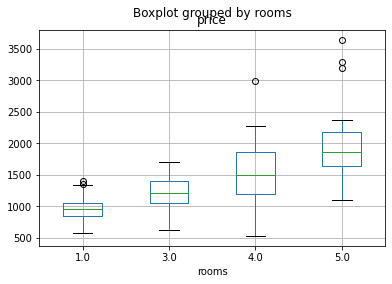

In [29]:
data.boxplot(by="rooms", column="price")

<AxesSubplot:title={'center':'price'}, xlabel='type'>

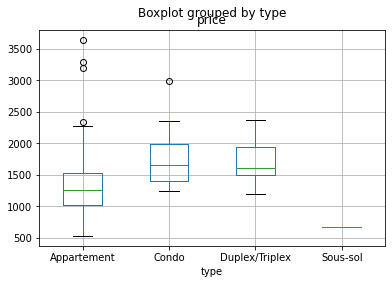

In [30]:
data.boxplot(by="type", column="price")

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

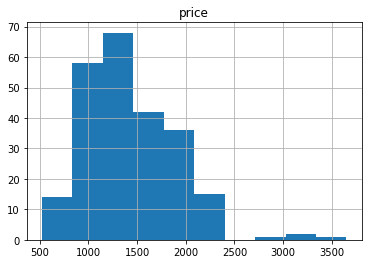

In [31]:
data.hist(column="price")

array([[<AxesSubplot:title={'center':'distance'}>]], dtype=object)

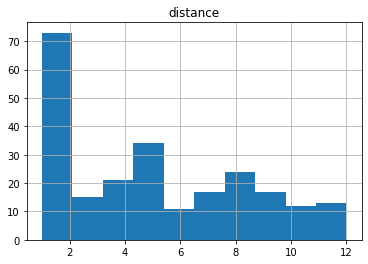

In [32]:
data.hist(column="distance")

<AxesSubplot:xlabel='distance', ylabel='price'>

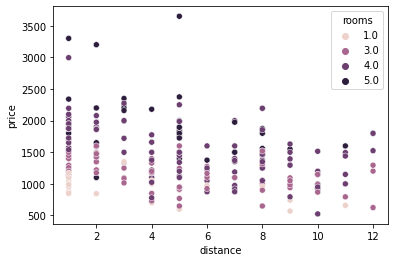

In [33]:
import seaborn as sns

sns.scatterplot(data=data, x="distance", y="price", hue="rooms")

<AxesSubplot:xlabel='distance', ylabel='price'>

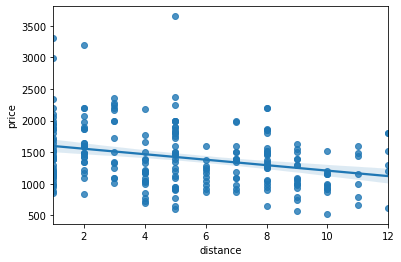

In [34]:
sns.regplot(data=data, x="distance", y="price")

In [35]:
data.groupby(["rooms", "electricity"]).mean()["price"]

rooms  electricity
1.0    False          1088.111111
       True            876.663768
3.0    False          1164.440741
       True           1285.858333
4.0    False          1489.652676
       True           1659.666667
5.0    False          1869.515152
       True           3003.333333
Name: price, dtype: float64

In [36]:
data.groupby(["rooms", "furnished"]).mean()["price"]

rooms  furnished
1.0    False         935.616977
       True         1098.333333
3.0    False        1192.924638
       True         1269.844444
4.0    False        1516.964323
       True         1501.600000
5.0    False        1862.925926
       True         2267.222222
Name: price, dtype: float64

In [37]:
data["luxury"].value_counts()

False    184
True      53
Name: luxury, dtype: int64

In [38]:
data.groupby(["rooms", "luxury"]).mean()["price"]

rooms  luxury
1.0    False      925.530435
       True      1006.666667
3.0    False     1207.437931
       True      1185.450000
4.0    False     1501.370883
       True      1583.141904
5.0    False     1952.551724
       True      2011.428571
Name: price, dtype: float64

In [39]:
data.groupby(["rooms", "parking_spots"]).mean()["price"]

rooms  parking_spots
1.0    0                 955.956522
       1                 955.956522
3.0    0                1192.886567
       1                1256.090909
4.0    0                1482.436283
       1                1633.616495
       2                1050.000000
       3                1400.000000
5.0    0                1869.750000
       1                2211.818182
       2                1500.000000
Name: price, dtype: float64

In [40]:
data.groupby(["rooms", "allow_pets"]).mean()["price"]

rooms  allow_pets
1.0    Limité        1059.000000
       Non            846.200000
       Oui           1020.661836
3.0    Limité        1155.777778
       Non           1145.077778
       Oui           1321.400000
4.0    Limité        1606.345829
       Non           1395.831615
       Oui           1721.933333
5.0    Limité        1957.933333
       Non           1965.937500
       Oui           1976.000000
Name: price, dtype: float64

In [41]:
data.groupby(["rooms", "allow_pets"]).count()["link"]

rooms  allow_pets
1.0    Limité         5
       Non           10
       Oui            9
3.0    Limité        18
       Non           36
       Oui           24
4.0    Limité        33
       Non           51
       Oui           15
5.0    Limité        15
       Non           16
       Oui            5
Name: link, dtype: int64

# Prediction with nearest neighbors

In [42]:
x_train = data.copy()
x_train = x_train.drop(columns=["title", "page", "link", "address", "size", "luxury", "price"])


In [43]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(x_train)

ValueError: could not convert string to float: 'Appartement'